In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Create a set of Random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats,lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy


In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

636

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key



In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d9f1fcccc084e9c4d3d01850c2920c40


In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime


In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | port elizabeth
Processing Record 3 of Set 1 | provideniya
Processing Record 4 of Set 1 | nagato
Processing Record 5 of Set 1 | atuona
Processing Record 6 of Set 1 | punta arenas
Processing Record 7 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 8 of Set 1 | aguimes
Processing Record 9 of Set 1 | esperance
Processing Record 10 of Set 1 | alofi
Processing Record 11 of Set 1 | yellowknife
Processing Record 12 of Set 1 | mount gambier
Processing Record 13 of Set 1 | haines junction
Processing Record 14 of Set 1 | kodiak
Processing Record 15 of Set 1 | tuktoyaktuk
Processing Record 16 of Set 1 | chokurdakh
Processing Record 17 of Set 1 | bluff
Processing Record 18 of Set 1 | ushuaia
Processing Record 19 of Set 1 | kununurra
Processing Record 20 of Set 1 | ciudad bolivar
Processing Record 21 of Set 1 | vila do maio
Processing Record 22 of Set

Processing Record 38 of Set 4 | caiaponia
Processing Record 39 of Set 4 | brainerd
Processing Record 40 of Set 4 | ribeira grande
Processing Record 41 of Set 4 | mahebourg
Processing Record 42 of Set 4 | padang
Processing Record 43 of Set 4 | huarmey
Processing Record 44 of Set 4 | cavalcante
Processing Record 45 of Set 4 | isangel
Processing Record 46 of Set 4 | harlingen
Processing Record 47 of Set 4 | ilulissat
Processing Record 48 of Set 4 | inhambupe
Processing Record 49 of Set 4 | san ramon
Processing Record 50 of Set 4 | kikwit
Processing Record 1 of Set 5 | hambantota
Processing Record 2 of Set 5 | sinnamary
Processing Record 3 of Set 5 | el balyana
City not found. Skipping...
Processing Record 4 of Set 5 | avarua
Processing Record 5 of Set 5 | san patricio
Processing Record 6 of Set 5 | saint george
Processing Record 7 of Set 5 | gandajika
Processing Record 8 of Set 5 | ngukurr
City not found. Skipping...
Processing Record 9 of Set 5 | gravelbourg
Processing Record 10 of Set 5

Processing Record 27 of Set 8 | mouila
Processing Record 28 of Set 8 | itarema
Processing Record 29 of Set 8 | moyale
Processing Record 30 of Set 8 | urbana
Processing Record 31 of Set 8 | batagay
Processing Record 32 of Set 8 | pisco
Processing Record 33 of Set 8 | makali
Processing Record 34 of Set 8 | borujan
City not found. Skipping...
Processing Record 35 of Set 8 | tarudant
City not found. Skipping...
Processing Record 36 of Set 8 | klaksvik
Processing Record 37 of Set 8 | pokosnoye
Processing Record 38 of Set 8 | henties bay
Processing Record 39 of Set 8 | pak phanang
Processing Record 40 of Set 8 | port moresby
Processing Record 41 of Set 8 | coquimbo
Processing Record 42 of Set 8 | san pedro
Processing Record 43 of Set 8 | mehamn
Processing Record 44 of Set 8 | ingham
Processing Record 45 of Set 8 | constitucion
Processing Record 46 of Set 8 | manuk mangkaw
Processing Record 47 of Set 8 | tres passos
Processing Record 48 of Set 8 | ixtapa
Processing Record 49 of Set 8 | cumari

Processing Record 16 of Set 12 | pilao arcado
City not found. Skipping...
Processing Record 17 of Set 12 | kulhudhuffushi
Processing Record 18 of Set 12 | taoru
Processing Record 19 of Set 12 | talnakh
Processing Record 20 of Set 12 | strezhevoy
Processing Record 21 of Set 12 | nikitinskiy
Processing Record 22 of Set 12 | inhambane
Processing Record 23 of Set 12 | igarka
Processing Record 24 of Set 12 | ahipara
Processing Record 25 of Set 12 | coruripe
Processing Record 26 of Set 12 | uige
Processing Record 27 of Set 12 | olafsvik
Processing Record 28 of Set 12 | tshikapa
Processing Record 29 of Set 12 | bolungarvik
City not found. Skipping...
Processing Record 30 of Set 12 | lesnoye
Processing Record 31 of Set 12 | beeskow
Processing Record 32 of Set 12 | san quintin
Processing Record 33 of Set 12 | port-gentil
Processing Record 34 of Set 12 | graham
Processing Record 35 of Set 12 | karaul
City not found. Skipping...
Processing Record 36 of Set 12 | san bartolome de tirajana
Processin

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.12,-134.97,73.53,69,39,10.40,PF,2020-11-05 00:48:47
1,Port Elizabeth,-33.92,25.57,66.20,93,90,9.17,ZA,2020-11-05 00:48:47
2,Provideniya,64.38,-173.30,37.40,86,90,22.37,RU,2020-11-05 00:48:47
3,Nagato,34.38,131.20,54.00,66,40,4.70,JP,2020-11-05 00:48:47
4,Atuona,-9.80,-139.03,79.03,75,0,21.52,PF,2020-11-05 00:48:47
5,Punta Arenas,-53.15,-70.92,46.40,87,90,4.70,CL,2020-11-05 00:47:37
6,Aguimes,27.91,-15.45,66.99,82,40,12.75,ES,2020-11-05 00:48:47
7,Esperance,-33.87,121.90,59.00,62,100,11.41,AU,2020-11-05 00:48:48
8,Alofi,-19.06,-169.92,80.60,65,75,23.04,NU,2020-11-05 00:48:48
9,Yellowknife,62.46,-114.35,5.00,77,75,8.05,CA,2020-11-05 00:48:48


In [11]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [12]:
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2020-11-05 00:48:47,-23.12,-134.97,73.53,69,39,10.40
1,Port Elizabeth,ZA,2020-11-05 00:48:47,-33.92,25.57,66.20,93,90,9.17
2,Provideniya,RU,2020-11-05 00:48:47,64.38,-173.30,37.40,86,90,22.37
3,Nagato,JP,2020-11-05 00:48:47,34.38,131.20,54.00,66,40,4.70
4,Atuona,PF,2020-11-05 00:48:47,-9.80,-139.03,79.03,75,0,21.52
...,...,...,...,...,...,...,...,...,...
577,Digha,IN,2020-11-05 00:50:03,21.68,87.55,68.81,59,0,6.31
578,Erzin,TR,2020-11-05 00:50:03,36.96,36.20,57.00,98,100,1.01
579,Meulaboh,ID,2020-11-05 00:47:35,4.14,96.13,77.83,84,100,4.70
580,San Matias,BO,2020-11-05 00:50:03,-16.37,-58.40,80.29,24,0,6.62


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [15]:
# Import the time module.
import time
today = time.strftime("%x")
today

'11/04/20'

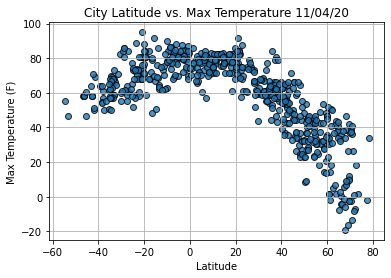

In [16]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

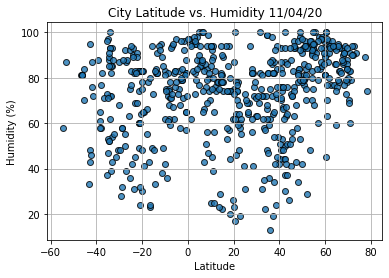

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

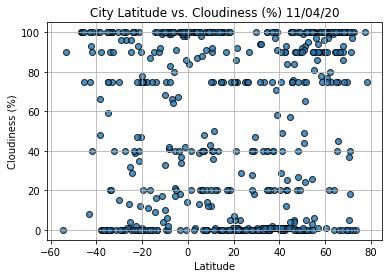

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

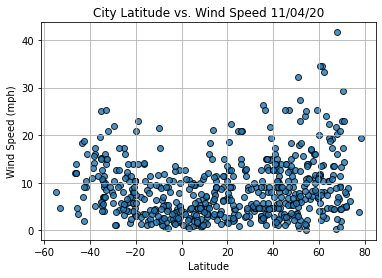

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [20]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
# Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [21]:
index13 = city_data_df.loc[13]
index13

City                  Tuktoyaktuk
Country                        CA
Date          2020-11-05 00:48:48
Lat                         69.45
Lng                       -133.04
Max Temp                     10.4
Humidity                       78
Cloudiness                     75
Wind Speed                  11.41
Name: 13, dtype: object

In [22]:
#we wanted to get all Northern Hemisphere latitudes, 
#for latitudes greater than or equal to 0
city_data_df["Lat"] >= 0

0      False
1      False
2       True
3       True
4      False
       ...  
577     True
578     True
579     True
580    False
581    False
Name: Lat, Length: 582, dtype: bool

In [23]:
#f we want to return a DataFrame with all data fitting the criteria, for latitudes greater than or equal to 0, 
#we can use the loc method on the city_data_df DataFrame. 
city_data_df.loc[(city_data_df["Lat"] >= 0)]


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Provideniya,RU,2020-11-05 00:48:47,64.38,-173.30,37.40,86,90,22.37
3,Nagato,JP,2020-11-05 00:48:47,34.38,131.20,54.00,66,40,4.70
6,Aguimes,ES,2020-11-05 00:48:47,27.91,-15.45,66.99,82,40,12.75
9,Yellowknife,CA,2020-11-05 00:48:48,62.46,-114.35,5.00,77,75,8.05
11,Haines Junction,CA,2020-11-05 00:48:48,60.75,-137.51,1.40,77,77,2.24
...,...,...,...,...,...,...,...,...,...
574,Chabahar,IR,2020-11-05 00:50:02,25.29,60.64,73.63,70,0,5.14
576,Garowe,SO,2020-11-05 00:50:02,8.41,48.48,72.27,56,14,7.54
577,Digha,IN,2020-11-05 00:50:03,21.68,87.55,68.81,59,0,6.31
578,Erzin,TR,2020-11-05 00:50:03,36.96,36.20,57.00,98,100,1.01


In [24]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [25]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

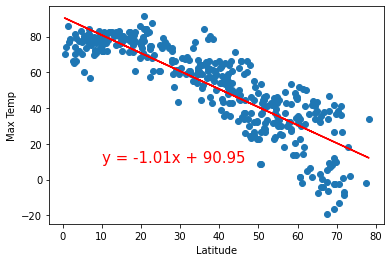

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,10))

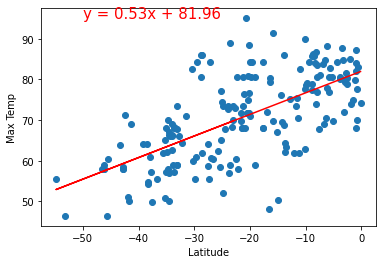

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,95))

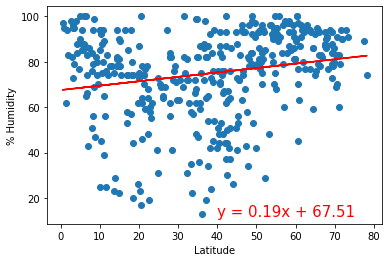

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,12))

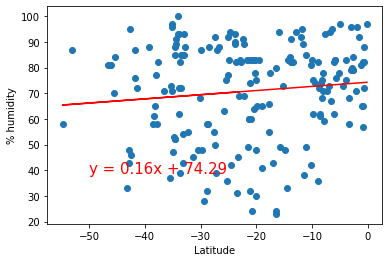

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
#call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for % Humidity', '% humidity', (-50, 39) )

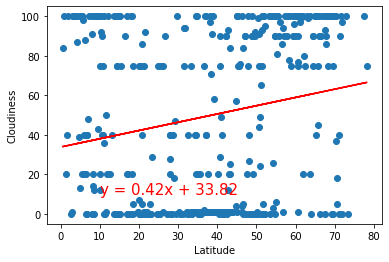

In [30]:
# Linear regression on the Northern Hemisphere Cloudiness Skill Drill
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for Cloudiness', 'Cloudiness',(10,10))


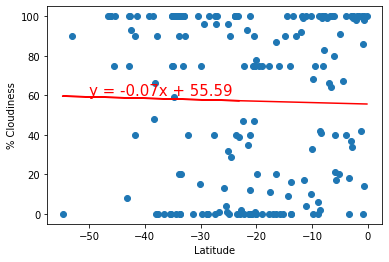

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values, "Linear Regression on the Southern Hemisphere \n for % Cloudiness", '% Cloudiness',(-50,60))

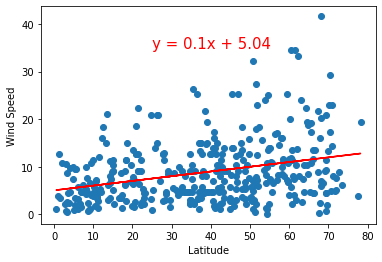

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(25,35))

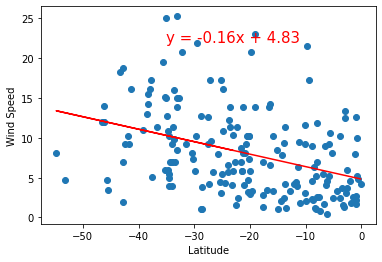

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-35,22))